# Importation des BD

In [74]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.offline as pyo
import numpy as np
import scipy
from statsmodels.stats import weightstats
import seaborn as sns
from copy import copy

In [75]:
test = pd.read_csv("D:/Simplon/Brief projet/Titanic/test.csv")
train = pd.read_csv("D:/Simplon/Brief projet/Titanic/train.csv")

# Analyse des données

In [76]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [77]:
trainn = train.drop_duplicates()
doublons = train.shape[0] - trainn.shape[0]
doublons_pct = doublons/train.shape[0]*100
print("Il y a", doublons, ", soit", round(doublons_pct, 4), "% de doublons dans la table Train.")

Il y a 0 , soit 0.0 % de doublons dans la table Train.


In [78]:
print(train.isnull().sum()/train.shape[0]*100)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [79]:
train["Age"].fillna(train["Age"].mean(), inplace = True)
del train["Cabin"]
train.dropna(inplace= True)

In [80]:
print(train.isnull().sum()/train.shape[0]*100)

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64


# DATAVIZ

In [81]:
train.Survived.groupby(train.Sex).value_counts()

Sex     Survived
female  1           231
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [82]:
labels1 = train.Sex[train.Survived == 0].groupby(train.Sex).count().index
labels2 = train.Sex[train.Survived == 1].groupby(train.Sex).count().index
values1 = train.Sex[train.Survived == 0].groupby(train.Sex).count().values
values2 = train.Sex[train.Survived == 1].groupby(train.Sex).count().values

fig1 = go.Figure(data=[
    go.Bar(name='Morts', x=labels1, y=values1),
    go.Bar(name='En vie', x=labels2, y=values2)
])

title = "Etat des passager en fonction du sexe"
# Change the bar mode
fig1.update_layout(title={'text' : title, 'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'}, barmode='group')
fig1.show()

In [83]:
train.Survived.groupby(train.Pclass).value_counts()

Pclass  Survived
1       1           134
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [84]:
labels1 = train.Pclass[train.Survived == 0].groupby(train.Pclass).count().index
labels2 = train.Pclass[train.Survived == 1].groupby(train.Pclass).count().index
values1 = train.Pclass[train.Survived == 0].groupby(train.Pclass).count().values
values2 = train.Pclass[train.Survived == 1].groupby(train.Pclass).count().values


fig2 = go.Figure(data=[
    go.Bar(name='Morts', x=labels1, y=values1),
    go.Bar(name='En vie', x=labels2, y=values2)
])

title = "Etat des passager en fonction de la classe de ticket"
# Change the bar mode
fig2.update_layout(title={'text' : title, 'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'}, barmode='group')
fig2.show()

In [85]:
train.Survived.groupby(train.Embarked).value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

In [86]:
def legend_embarked(liste) :
    L = liste.to_list()
    for k in range(len(L)) :
        if L[k] == "C" :
            L[k] = "Cherbourg"
        elif L[k] == "Q" :
            L[k] = "Queenstown"
        elif L[k] == "S" :
            L[k] = "Southampton"
    return L

In [87]:
labels1 = train.Embarked[train.Survived == 0].groupby(train.Embarked).count().index
labels2 = train.Embarked[train.Survived == 1].groupby(train.Embarked).count().index
values1 = train.Embarked[train.Survived == 0].groupby(train.Embarked).count().values
values2 = train.Embarked[train.Survived == 1].groupby(train.Embarked).count().values

fig3 = go.Figure(data=[
    go.Bar(name='Morts', x=legend_embarked(labels1), y=values1),
    go.Bar(name='En vie', x=legend_embarked(labels2), y=values2)
])

title = "Etat des passager en fonction du point d'embarquement"
# Change the bar mode
fig3.update_layout(title={'text' : title, 'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'}, barmode='group')
fig3.show()

In [88]:
def process_age(df, cut_points, labels) :
    df["Age_categorie"] = pd.cut(df["Age"], cut_points, labels = labels)
    return df

cut_points = [0, 5, 18, 30, 60, 100]
labels = ["Baby", "Child", "Junior", "Adult", "Senior"]

train = process_age(train, cut_points, labels)

In [89]:
train.Survived.groupby(train.Age_categorie).value_counts()

Age_categorie  Survived
Baby           1            31
               0            13
Child          0            56
               1            39
Junior         0           299
               1           148
Adult          0           164
               1           118
Senior         0            17
               1             4
Name: Survived, dtype: int64

In [90]:
labels1 = train.Age[train.Survived == 0].groupby(train.Age_categorie[train.Survived == 0]).count().index
labels2 = train.Age[train.Survived == 1].groupby(train.Age_categorie[train.Survived == 1]).count().index
values1 = train.Age[train.Survived == 0].groupby(train.Age_categorie[train.Survived == 0]).count().values
values2 = train.Age[train.Survived == 1].groupby(train.Age_categorie[train.Survived == 1]).count().values


fig4 = go.Figure(data=[
    go.Bar(name='Morts', x=labels1, y=values1),
    go.Bar(name='En vie', x=labels2, y=values2)
])

title = "Etat des passager en fonction de leur âge"
# Change the bar mode
fig4.update_layout(title={'text' : title, 'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'}, barmode='group')
fig4.show()

In [91]:
train.Fare.describe()

count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [92]:
def process_fare(df, cut_points, labels) :
    df["Fare_categorie"] = pd.cut(df["Fare"], cut_points, labels = labels)
    return df

cut_points = [0, 8, 15, 30, 1000]
labels = ["Cheap", "Low", "High", "Expensive"]

train = process_fare(train, cut_points, labels)

In [93]:
train.Survived.groupby(train.Fare_categorie).value_counts()

Fare_categorie  Survived
Cheap           0           175
                1            51
Low             0           155
                1            62
High            0           107
                1            92
Expensive       1           134
                0            98
Name: Survived, dtype: int64

In [94]:
labels1 = train.Fare[train.Survived == 0].groupby(train.Fare_categorie[train.Survived == 0]).count().index
labels2 = train.Fare[train.Survived == 1].groupby(train.Fare_categorie[train.Survived == 1]).count().index
values1 = train.Fare[train.Survived == 0].groupby(train.Fare_categorie[train.Survived == 0]).count().values
values2 = train.Fare[train.Survived == 1].groupby(train.Fare_categorie[train.Survived == 1]).count().values


fig6 = go.Figure(data=[
    go.Bar(name='Morts', x=labels1, y=values1),
    go.Bar(name='En vie', x=labels2, y=values2)
])

title = "Etat des passager en fonction du prix du ticket"
# Change the bar mode
fig6.update_layout(title={'text' : title, 'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'}, barmode='group')
fig6.show()

In [95]:
a = train.Fare.groupby(train.Embarked).mean()
a

Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64

In [96]:
title = "Moyenne des tarifs par lieu d'embarquement"

fig7 = px.bar(a, x = legend_embarked(a.index), y = a.values, title = {'text' : title, 'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})
fig7.show()

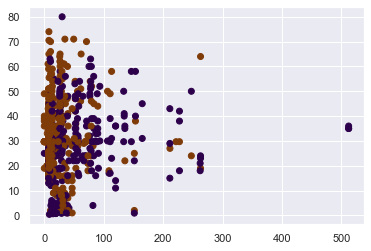

In [97]:
fig8 = plt.scatter(train['Fare'], train['Age'], c=train['Survived'], cmap="PuOr")
fig8

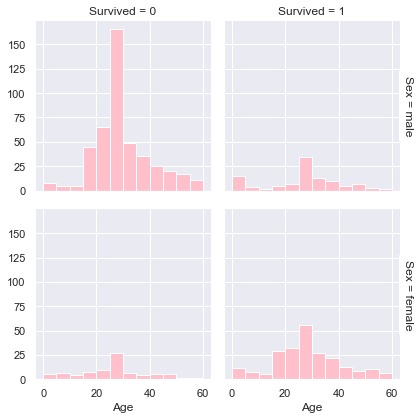

In [98]:
sns.set(style="darkgrid")
g = sns.FacetGrid(train, row="Sex", col="Survived", margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(plt.hist, "Age", color="pink", bins=bins)

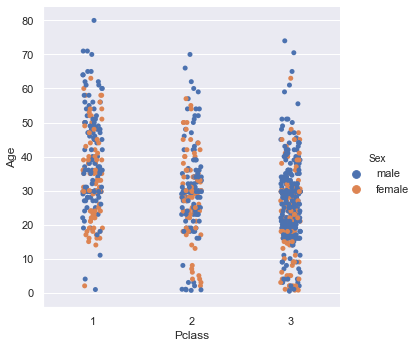

In [99]:
sns.catplot(x="Pclass", y="Age", data=train, hue = "Sex")

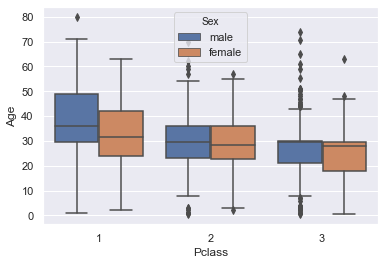

In [100]:
sns.boxplot(x="Pclass", y="Age", data=train, hue = "Sex")

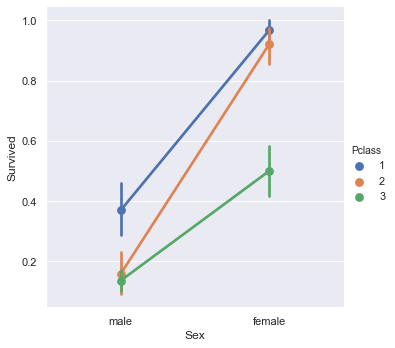

In [101]:
sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="point", data=train)

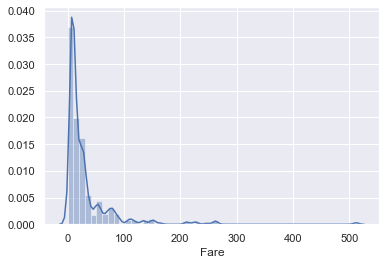

In [102]:
sns.distplot(train['Fare'])

# Tests statistiques

In [103]:
train = pd.read_csv("D:/Simplon/Brief projet/Titanic/train.csv")
train["Age"].fillna(train["Age"].mean(), inplace = True)
del train["Cabin"]
train.dropna(inplace= True)

In [104]:
cut_points = [0, 5, 18, 30, 60, 100]
labels = ["Baby", "Child", "Junior", "Adult", "Senior"]

train = process_age(train, cut_points, labels)

cut_points = [0, 8, 15, 30, 1000]
labels = ["Cheap", "Low", "High", "Expensive"]

train = process_fare(train, cut_points, labels)

In [105]:
train_stats = train

In [106]:
del train_stats['Name']
del train_stats['Ticket']
del train_stats['Age_categorie']
del train_stats['Fare_categorie']

In [107]:
train_stats = pd.get_dummies(train_stats)

In [108]:
train_stats.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [109]:
train_stats.shape

(889, 12)

In [110]:
train_stats.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [111]:
train_stats.corr(method='pearson')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.005028,-0.035330,0.030300,-0.057686,-0.001657,0.012703,-0.043136,0.043136,-0.001208,-0.033694,0.022269
Survived,-0.005028,1.000000,-0.335549,-0.074673,-0.034040,0.083151,0.255290,0.541585,-0.541585,0.169966,0.004536,-0.151777
Pclass,-0.035330,-0.335549,1.000000,-0.327954,0.081656,0.016824,-0.548193,-0.127741,0.127741,-0.245733,0.220558,0.076466
Age,0.030300,-0.074673,-0.327954,1.000000,-0.231875,-0.178232,0.088604,-0.089434,0.089434,0.033853,-0.012823,-0.021589
SibSp,-0.057686,-0.034040,0.081656,-0.231875,1.000000,0.414542,0.160887,0.116348,-0.116348,-0.060074,-0.026692,0.069438
Parch,-0.001657,0.083151,0.016824,-0.178232,0.414542,1.000000,0.217532,0.247508,-0.247508,-0.011588,-0.081585,0.061512
Fare,0.012703,0.255290,-0.548193,0.088604,0.160887,0.217532,1.000000,0.179958,-0.179958,0.270731,-0.116684,-0.163758
Sex_female,-0.043136,0.541585,-0.127741,-0.089434,0.116348,0.247508,0.179958,1.000000,-1.000000,0.084520,0.075217,-0.121405
Sex_male,0.043136,-0.541585,0.127741,0.089434,-0.116348,-0.247508,-0.179958,-1.000000,1.000000,-0.084520,-0.075217,0.121405
Embarked_C,-0.001208,0.169966,-0.245733,0.033853,-0.060074,-0.011588,0.270731,0.084520,-0.084520,1.000000,-0.148646,-0.782613


In [112]:
train_stats.corr(method='spearman')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.004997,-0.034260,0.040681,-0.061310,0.001197,-0.014072,-0.043118,0.043118,-0.001209,-0.033629,0.022229
Survived,-0.004997,1.000000,-0.336917,-0.043135,0.090944,0.140126,0.320772,0.541585,-0.541585,0.169966,0.004536,-0.151777
Pclass,-0.034260,-0.336917,1.000000,-0.305614,-0.045279,-0.024696,-0.686166,-0.131944,0.131944,-0.222955,0.229391,0.050948
Age,0.040681,-0.043135,-0.305614,1.000000,-0.145570,-0.216402,0.114772,-0.072262,0.072262,0.025885,0.003763,-0.025050
SibSp,-0.061310,0.090944,-0.045279,-0.145570,1.000000,0.449607,0.450749,0.197740,-0.197740,0.013423,-0.049016,0.019095
Parch,0.001197,0.140126,-0.024696,-0.216402,0.449607,1.000000,0.413106,0.256835,-0.256835,0.022505,-0.099681,0.043031
Fare,-0.014072,0.320772,-0.686166,0.114772,0.450749,0.413106,1.000000,0.256188,-0.256188,0.205877,-0.231820,-0.034455
Sex_female,-0.043118,0.541585,-0.131944,-0.072262,0.197740,0.256835,0.256188,1.000000,-1.000000,0.084520,0.075217,-0.121405
Sex_male,0.043118,-0.541585,0.131944,0.072262,-0.197740,-0.256835,-0.256188,-1.000000,1.000000,-0.084520,-0.075217,0.121405
Embarked_C,-0.001209,0.169966,-0.222955,0.025885,0.013423,0.022505,0.205877,0.084520,-0.084520,1.000000,-0.148646,-0.782613


In [113]:
train_stats.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'))

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.0,-0.005,-0.035,0.03,-0.058,-0.0017,0.013,-0.043,0.043,-0.0012,-0.034,0.022
Survived,-0.005,1.0,-0.34,-0.075,-0.034,0.083,0.26,0.54,-0.54,0.17,0.0045,-0.15
Pclass,-0.035,-0.34,1.0,-0.33,0.082,0.017,-0.55,-0.13,0.13,-0.25,0.22,0.076
Age,0.03,-0.075,-0.33,1.0,-0.23,-0.18,0.089,-0.089,0.089,0.034,-0.013,-0.022
SibSp,-0.058,-0.034,0.082,-0.23,1.0,0.41,0.16,0.12,-0.12,-0.06,-0.027,0.069
Parch,-0.0017,0.083,0.017,-0.18,0.41,1.0,0.22,0.25,-0.25,-0.012,-0.082,0.062
Fare,0.013,0.26,-0.55,0.089,0.16,0.22,1.0,0.18,-0.18,0.27,-0.12,-0.16
Sex_female,-0.043,0.54,-0.13,-0.089,0.12,0.25,0.18,1.0,-1.0,0.085,0.075,-0.12
Sex_male,0.043,-0.54,0.13,0.089,-0.12,-0.25,-0.18,-1.0,1.0,-0.085,-0.075,0.12
Embarked_C,-0.0012,0.17,-0.25,0.034,-0.06,-0.012,0.27,0.085,-0.085,1.0,-0.15,-0.78


In [114]:
from scipy.stats import chi2_contingency
contingence = pd.crosstab(train_stats.Sex_female, train_stats.Survived)
khi2, p, dof, expected = chi2_contingency(contingence)
alpha = 0.05
print(khi2, p, dof)
if p <= alpha:
    print('Les deux variables ne sont pas indépendantes.')
else:
    print('Les deux variables sont indépendantes.')

258.42661044637634 3.7799096665574906e-58 1
Les deux variables ne sont pas indépendantes.


In [115]:
from scipy.stats import chi2_contingency
contingence = pd.crosstab(train_stats.Age < 18, train_stats.Survived)
khi2, p, dof, expected = chi2_contingency(contingence)
alpha = 0.05
print(khi2, p, dof)
if p <= alpha:
    print('Les deux variables ne sont pas indépendantes.')
else:
    print('Les deux variables sont indépendantes.')

12.821746858047035 0.00034261369274988666 1
Les deux variables ne sont pas indépendantes.


In [116]:
from scipy.stats import chi2_contingency
contingence = pd.crosstab(train_stats.Fare, train_stats.Survived)
khi2, p, dof, expected = chi2_contingency(contingence)
alpha = 0.05
print(khi2, p, dof)
if p <= alpha:
    print('Les deux variables ne sont pas indépendantes.')
else:
    print('Les deux variables sont indépendantes.')

423.17028866639606 1.553812876621213e-11 246
Les deux variables ne sont pas indépendantes.


In [117]:
from scipy.stats import chi2_contingency
contingence = pd.crosstab(train_stats.Pclass, train_stats.Survived)
khi2, p, dof, expected = chi2_contingency(contingence)
alpha = 0.05
print(khi2, p, dof)
if p <= alpha:
    print('Les deux variables ne sont pas indépendantes.')
else:
    print('Les deux variables sont indépendantes.')

100.98040726128336 1.1813624785477922e-22 2
Les deux variables ne sont pas indépendantes.


# Régression linéraire

# Régression logistique

In [118]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


## Sélection des variables

In [119]:
train_stats = pd.get_dummies(train_stats)

In [120]:
train_stats.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


## Création et entraînement du modèle

In [121]:
X = train_stats[["Age", "Sex_female", "Pclass"]]
y = train.Survived

In [122]:
# Modèle de régression logistique sur le training set
from sklearn.linear_model import LogisticRegression
reg_log2 = LogisticRegression(solver='lbfgs', multi_class='auto', penalty ='none', random_state = 0)
reg_log2.fit(X, y)

# Matrice de confusion
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(y, reg_log2.predict(X)), columns=['prédit ' + str(_) for _ in reg_log2.classes_])
cm.index = ['vrai ' + str(_) for _ in reg_log2.classes_]
print(cm)

# Visualisation des probabilités prédites
plt.scatter(X,y)
plt.plot(X,model.predict(X),c='red')
plt.plot(sorted(X),reg_log.predict_proba(sorted(X))[:,1],c='green')
plt.scatter(sorted(X.Age),reg_log2.predict_proba(X.sort_values('Age'))[:,1],c='purple')
plt.show()

prédit 0  prédit 1
vrai 0       470        79
vrai 1        98       242


ValueError: x and y must be the same size

In [123]:
#affichage plus "joli" de la matrice de confusion
cm = pd.DataFrame(cm, columns=['prédit ' + str(_) for _ in reg_log2.classes_])
cm.index = ['vrai ' + str(_) for _ in reg_log2.classes_]
cm

,prédit 0,prédit 1
vrai 0,470,79
vrai 1,98,242


# Evaluation du modèle

In [124]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred)) # le plus important pour le moment; précisément la première ligne

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

NameError: name 'y_test' is not defined

# DASH

# Correlation

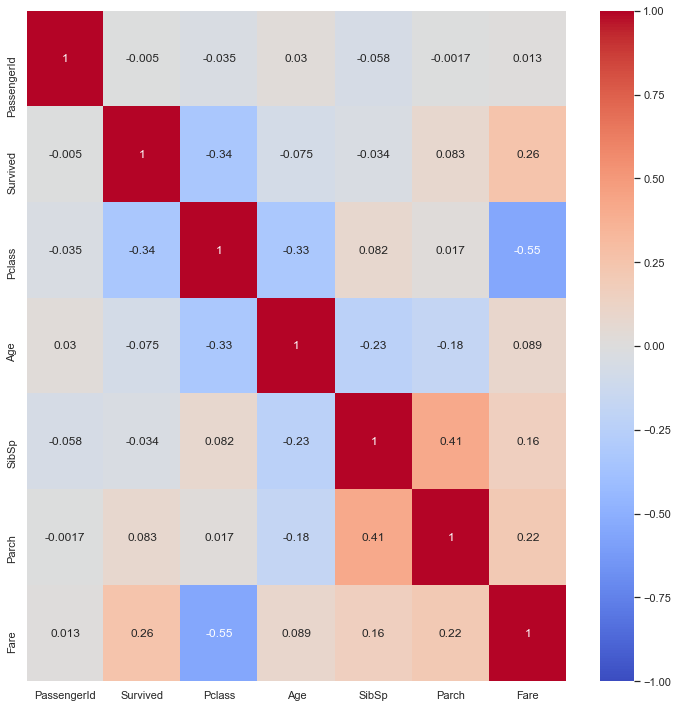

In [125]:
fig, ax = plt.subplots(figsize=(10,10))  
corr = train.corr()
ax =sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
plt.tight_layout()
plt.show()

# 

# La régression logistique

In [126]:
train = pd.read_csv("D:/Simplon/Brief projet/Titanic/train.csv")
train["Age"].fillna(train["Age"].mean(), inplace = True)
del train["Cabin"]
train.dropna(inplace= True)

In [127]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


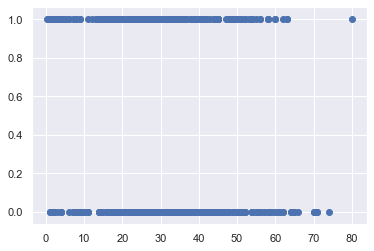

In [128]:
plt.scatter(train.Age,train.Survived)

## Régression Linéaire

0.465479572679555
[-0.00279992]
R² : 0.005576045547320052
RMSE : 0.4846292900046108


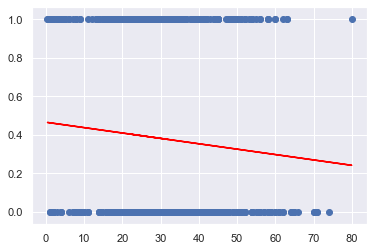

In [129]:
# Les données
x = train['Age'].values.reshape(-1,1)
y = train['Survived']

# Construction du modèle
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)
import numpy as np
print(model.intercept_)
print(model.coef_)

#calcul du R²
print("R² :", model.score(x,y))

RMSE=np.sqrt(((y-model.predict(x))**2).sum()/len(y))
print("RMSE :", RMSE)


# Visualisation
plt.scatter(x,y)
plt.plot(x,model.predict(x),c='red')
plt.show()

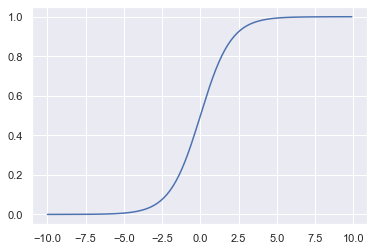

In [130]:
# Fonction sigmoide
import numpy as np
from math import exp
sig = lambda x : 1/(1+exp(-x))

x_values = np.arange(-10,10,0.1)
    
plt.plot(x_values,list(map(sig,x_values)))
plt.show()

## Une première regression logistique

In [131]:
x = train['Age'].values.reshape(-1,1)
y = train['Survived']

# Modèle de régression logistique
from sklearn.linear_model import LogisticRegression
reg_log = LogisticRegression(solver='lbfgs', multi_class='auto', random_state = 0)
reg_log.fit(x, y)

# Prédictions des probabilités
prob_pred = reg_log.predict_proba(x)

# Prédictions des résultats du Test set
y_pred = reg_log.predict(x)

# Matrice de confusion
from sklearn.metrics import confusion_matrix
#affichage plus "joli" de la matrice de confusion
cm = pd.DataFrame(confusion_matrix(y, y_pred), columns=['prédit ' + str(_) for _ in reg_log.classes_])
cm.index = ['vrai ' + str(_) for _ in reg_log.classes_]
cm

,prédit 0,prédit 1
vrai 0,549,0
vrai 1,340,0


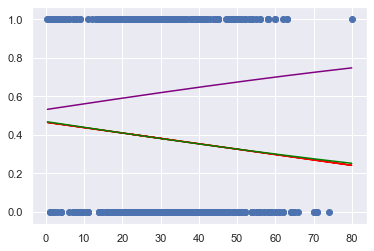

In [132]:
plt.scatter(x,y)
plt.plot(x,model.predict(x),c='red')
plt.plot(sorted(x),reg_log.predict_proba(sorted(x))[:,1],c='green')
plt.plot(sorted(x),reg_log.predict_proba(sorted(x))[:,0],c='purple')
plt.show()

prédit 0  prédit 1
vrai 0       468        81
vrai 1       109       231


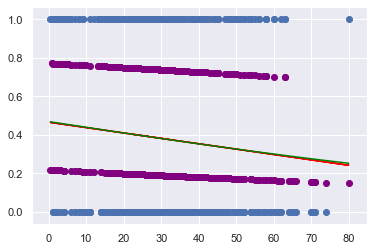

In [133]:
X = train_stats[['Age','Sex_female']]
y = train_stats['Survived']

# Modèle de régression logistique sur le training set
from sklearn.linear_model import LogisticRegression
reg_log2 = LogisticRegression(solver='lbfgs', multi_class='auto', penalty ='none', random_state = 0)
reg_log2.fit(X, y)

# Matrice de confusion
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(y, reg_log2.predict(X)), columns=['prédit ' + str(_) for _ in reg_log2.classes_])
cm.index = ['vrai ' + str(_) for _ in reg_log2.classes_]
print(cm)

# Visualisation des probabilités prédites
plt.scatter(x,y)
plt.plot(x,model.predict(x),c='red')
plt.plot(sorted(x),reg_log.predict_proba(sorted(x))[:,1],c='green')
plt.scatter(sorted(X.Age),reg_log2.predict_proba(X.sort_values('Age'))[:,1],c='purple')
plt.show()

In [134]:
#affichage plus "joli" de la matrice de confusion
cm = pd.DataFrame(cm, columns=['prédit ' + str(_) for _ in reg_log2.classes_])
cm.index = ['vrai ' + str(_) for _ in reg_log2.classes_]
cm

,prédit 0,prédit 1
vrai 0,468,81
vrai 1,109,231


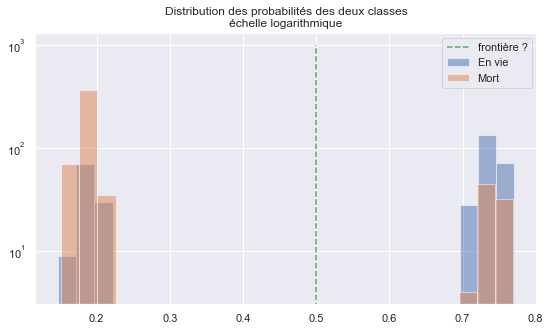

In [135]:
proba_1 = reg_log2.predict_proba(X)[:, 1]
pr = pd.DataFrame(proba_1, columns=['proba'])
pr['Action'] = y.values

fig, ax = plt.subplots(1,1,figsize=(9,5))

pr[pr.Action == 1]['proba'].hist(bins=25, label='En vie', alpha=0.5, ax=ax)
pr[pr.Action == 0]['proba'].hist(bins=25, label='Mort', alpha=0.5, ax=ax)
ax.plot([0.5, 0.5], [0, 1000], 'g--', label="frontière ?")
ax.set_yscale('log') #l'échelle logarithmique permet de mieux voir les probabilités qui sont faibles
ax.set_title('Distribution des probabilités des deux classes\néchelle logarithmique')
ax.legend()

## Courbe ROC et AUC

In [136]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
proba = reg_log2.predict_proba(X)
fpr0, tpr0, thresholds0 = roc_curve(y, proba[:, 0], pos_label=reg_log2.classes_[0], drop_intermediate=False)
thresholds0.shape

(147,)

In [137]:
tp = pd.DataFrame(dict(fpr=fpr0, tpr=tpr0, threshold=thresholds0))
#tp.head()
tp.drop(0, axis=0, inplace=True) #suppression du 1er seuil fixé arbitrairement à 2

Text(0.5, 1.0, 'Evolution de FPR, TPR\nen fonction du seuil au delà duquel\nla réponse du classifieur est validée')

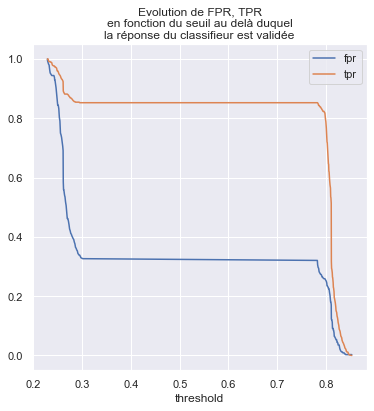

In [138]:
ax = tp.plot(x="threshold", y=['fpr', 'tpr'], figsize=(6,6))
ax.set_title("Evolution de FPR, TPR\nen fonction du seuil au delà duquel\n" + 
             "la réponse du classifieur est validée")

Text(0.5, 1.0, 'Evolution de FPR, TPR\nen fonction du seuil au delà duquel\nla réponse du classifieur est validée')

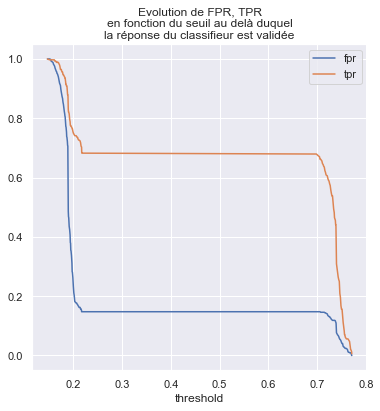

In [139]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
proba = reg_log2.predict_proba(X)
fpr1, tpr1, thresholds1 = roc_curve(y, proba[:, 1], pos_label=reg_log2.classes_[1], drop_intermediate=False)

tp = pd.DataFrame(dict(fpr=fpr1, tpr=tpr1, threshold=thresholds1))
tp.drop(0, axis=0, inplace=True) #suppression du 1er seuil fixé arbitrairement à 2

ax = tp.plot(x="threshold", y=['fpr', 'tpr'], figsize=(6,6))
ax.set_title("Evolution de FPR, TPR\nen fonction du seuil au delà duquel\n" + 
             "la réponse du classifieur est validée")

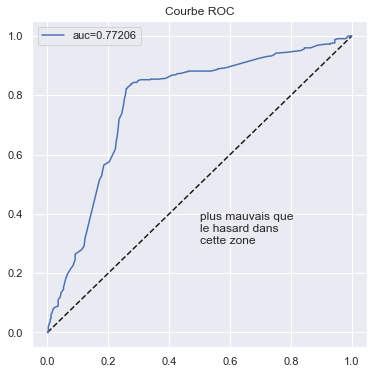

In [140]:
fig, ax = plt.subplots(1, 1, figsize=(6,6))
ax.plot([0, 1], [0, 1], 'k--')
aucf = auc(fpr0, tpr0)
ax.plot(fpr0, tpr0, label='auc=%1.5f' % aucf)
ax.set_title('Courbe ROC')
ax.text(0.5, 0.3, "plus mauvais que\nle hasard dans\ncette zone")
ax.legend()

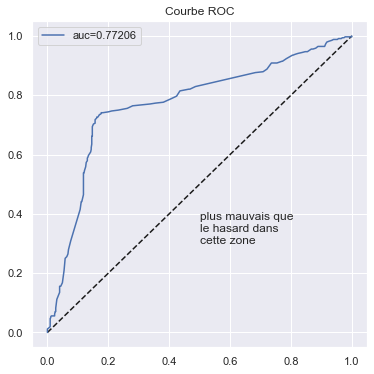

In [141]:
fig, ax = plt.subplots(1, 1, figsize=(6,6))
ax.plot([0, 1], [0, 1], 'k--')
aucf = auc(fpr1, tpr1)
ax.plot(fpr1, tpr1, label='auc=%1.5f' % aucf)
ax.set_title('Courbe ROC')
ax.text(0.5, 0.3, "plus mauvais que\nle hasard dans\ncette zone")
ax.legend()

Text(0.5, 1.0, 'Evolution de la précision et du rappel\nen fonction du seuil au delà duquel\nla réponse du classifieur est validée')

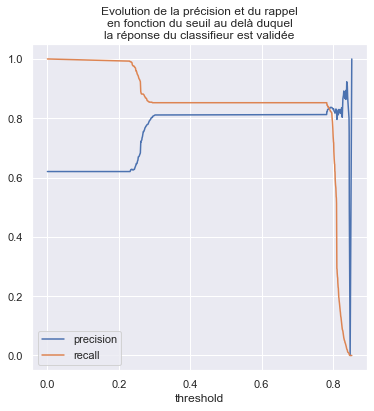

In [142]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y, proba[:, 0], pos_label=reg_log2.classes_[0])

pr = pd.DataFrame(dict(precision=precision, recall=recall, 
                             threshold=[0] + list(thresholds)))

ax = pr.plot(x="threshold", y=['precision', 'recall'], figsize=(6,6))
ax.set_title("Evolution de la précision et du rappel\nen fonction du seuil au delà duquel\n" + 
             "la réponse du classifieur est validée")

## Interprétation des coefficients

In [143]:
### Affichage des coefficients obtenus avec sklearn sous forme d'un dataframe
coef = pd.DataFrame(np.concatenate([reg_log2.intercept_.reshape(-1,1), reg_log2.coef_],axis=1),
             index = ["Coefficients"],
             columns = ["constante"]+list(X.columns)).T

# Calcul de l'exponentiel pour avoir les odds-ratio
coef["OR"] = np.exp(coef.Coefficients)
coef

,Coefficients,OR
constante,-1.275808,0.279205
Age,-0.006006,0.994012
Sex_female,2.493802,12.107224


In [144]:
### Construction du même modèle avec statsmodels
import statsmodels.api as sm
X = sm.add_constant(X) #rappel: par défaut statsmodel ne met pas de constante dans les modèles
reg_log3 = sm.Logit(y, X)
res = reg_log3.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.515032
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  889
Model:                          Logit   Df Residuals:                      886
Method:                           MLE   Df Model:                            2
Date:                Mon, 11 May 2020   Pseudo R-squ.:                  0.2258
Time:                        13:41:46   Log-Likelihood:                -457.86
converged:                       True   LL-Null:                       -591.41
Covariance Type:            nonrobust   LLR p-value:                 1.004e-58
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2758      0.219     -5.813      0.000      -1.706      -0.846
Age           -0.0060      0.006     -0.935      0.350      -0.019       0.007
Sex_female     2.4938      0.168     14.880      0.000       2.165       2.822
==============================================================================
"""

In [145]:
#Comparaison avec le modèle où on remplace Female par Male
X = train_stats[['Age','Sex_female']]

X = sm.add_constant(X)
reg_log4 = sm.Logit(y, X)
res = reg_log4.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.515032
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  889
Model:                          Logit   Df Residuals:                      886
Method:                           MLE   Df Model:                            2
Date:                Mon, 11 May 2020   Pseudo R-squ.:                  0.2258
Time:                        13:41:46   Log-Likelihood:                -457.86
converged:                       True   LL-Null:                       -591.41
Covariance Type:            nonrobust   LLR p-value:                 1.004e-58
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2758      0.219     -5.813      0.000      -1.706      -0.846
Age           -0.0060      0.006     -0.935      0.350      -0.019       0.007
Sex_female     2.4938      0.168     14.880      0.000       2.165       2.822
==============================================================================
"""

In [146]:
np.exp(res.params)

const          0.279207
Age            0.994012
Sex_female    12.107157
dtype: float64